In [ ]:
pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ogochukwuchidolue","key":"953053ec640ec6dbbc37268f67eeb938"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c planet-understanding-the-amazon-from-space

  0% 0.00/148k [00:00<?, ?B/s]
100% 148k/148k [00:00<00:00, 21.8MB/s]
  0% 0.00/600k [00:00<?, ?B/s]
100% 600k/600k [00:00<00:00, 83.5MB/s]
  0% 0.00/151k [00:00<?, ?B/s]
100% 151k/151k [00:00<00:00, 46.1MB/s]
  0% 0.00/1.52M [00:00<?, ?B/s]
100% 1.52M/1.52M [00:00<00:00, 101MB/s]
  0% 0.00/1.01M [00:00<?, ?B/s]
100% 1.01M/1.01M [00:00<00:00, 141MB/s]


In [ ]:
!ls

kaggle.json			     sample_submission_v2.csv.zip
Kaggle-planet-test-tif.torrent.zip   test_v2_file_mapping.csv
Kaggle-planet-train-tif.torrent.zip  train_v2.csv.zip
sample_data


In [ ]:
!unzip \*.zip && rm *.zip

Archive:  train_v2.csv.zip
  inflating: train_v2.csv            

Archive:  Kaggle-planet-test-tif.torrent.zip
  inflating: Kaggle-planet-test-tif.torrent  

Archive:  Kaggle-planet-train-tif.torrent.zip
  inflating: Kaggle-planet-train-tif.torrent  

Archive:  sample_submission_v2.csv.zip
  inflating: sample_submission_v2.csv  

4 archives were successfully processed.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [ ]:
mnist= keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print("Training data: {} {}".format(train_images.shape, train_labels.shape))

Training data: (60000, 28, 28) (60000,)


In [ ]:
print("Test data: {}, {}".format(test_images.shape, test_labels.shape))

Test data: (10000, 28, 28), (10000,)


In [ ]:
class_labels = np.unique(train_labels)
print("There are {} classes in the dataset. They are: {}".format(len(class_labels), class_labels))

There are 10 classes in the dataset. They are: [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Label: 5')

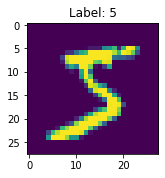

In [ ]:
plt.figure(figsize=(8,5))

plt.subplot(1,3,1)
plt.imshow(train_images[0])
plt.title("Label: {}".format(train_labels[0]))

Text(0.5, 1.0, 'Labeel: 0')

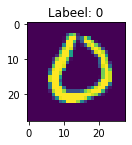

In [ ]:
plt.subplot(1,3,2)
plt.imshow(train_images[2500])
plt.title("Labeel: {}".format(train_labels[2500]))

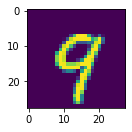

In [ ]:
plt.subplot(1,3,3)
plt.imshow(test_images[12])
plt.show()

In [ ]:
train_images = train_images / 255.0
tst_images = test_images / 255.0

In [ ]:
x_train = train_images[0:50000]
x_val = train_images[50000:]
y_train = train_labels[0:50000]
y_val = train_labels[50000:]

print("x_train: {}".format(x_train.shape))
print("x_val: {}".format(x_val.shape))
print("y_train: {}".format(y_train.shape))
print("y_val: {}".format(y_val.shape))

x_train: (50000, 28, 28)
x_val: (10000, 28, 28)
y_train: (50000,)
y_val: (10000,)


In [ ]:
from tensorflow.keras.utils import to_categorical
no_labels = 10
y_train = to_categorical(y_train, no_labels)
y_val = to_categorical(y_val, no_labels)
y_test = to_categorical(test_labels, no_labels)

In [ ]:
new_dimension = np.prod(train_images.shape[1:])
x_train = x_train.reshape(x_train.shape[0], new_dimension)
x_val = x_val.reshape(x_val.shape[0], new_dimension)
test_images = test_images.reshape(test_images.shape[0], new_dimension)

print("x_train: {}".format(x_train.shape))
print("x_val: {}".format(x_val.shape))
print("test_mages: {}".format(test_images.shape))

x_train: (50000, 784)
x_val: (10000, 784)
test_mages: (10000, 784)


In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
X = tf.placeholder(tf.float32, [None, new_dimension])
Y = tf.placeholder(tf.float32, [None, no_labels])

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
def multilayer_perceptron (x, no_classes, first_layer_neurons=256, second_layer_neurons=128):
     #first layer 
    first_weight = tf.Variable(tf.random_uniform([new_dimension, first_layer_neurons]))
    first_bias = tf.Variable(tf.zeros([first_layer_neurons]))
    first_layer_output = tf.nn.relu(tf.add(tf.matmul(x, first_weight), first_bias))
    #second layer
    second_weight = tf.Variable(tf.random_uniform([first_layer_neurons,second_layer_neurons]))
    second_bias = tf.Variable(tf.zeros([second_layer_neurons]))
    second_layer_output = tf.nn.relu(tf.add(tf.matmul(first_layer_output, second_weight), second_bias))
    #output layer 
    final_weight = tf.Variable(tf.random_uniform([second_layer_neurons, no_classes]))
    final_bias = tf.Variable(tf.zeros([no_classes]))
    logits = tf.add(tf.matmul(second_layer_output, final_weight), final_bias)

    return logits

In [ ]:
logits = multilayer_perceptron(X, no_labels)
learning_rate = 0.01
#to define the function and optimiser for the network
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels=Y))
optimiser = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimiser.minimize(loss_op)


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [ ]:
#initialise the variables 
init = tf.global_variables_initializer()

epochs = 20
batch_size = 1000
iteration = len(x_train)// batch_size
#train model
with tf.Session() as session:
  session.run(init)
  for epoch in range(epochs):
    average_cost = 0 
    start, end = 0, batch_size
    for i in range(iteration):
      batch_x, batch_y = x_train[start: end], y_train[start: end]
      _, loss = session.run([train_op, loss_op], feed_dict={X: batch_x, Y: batch_y})
      start += batch_size
      end += batch_size
      #average loss
      average_cost += loss/iteration
      print("Epoch======== {}".format(epoch))
      #evaluate model
  prediction = tf.nn.softmax(logits)
  ground_truth = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
  accuracy = tf.reduce_mean(tf.cast(ground_truth, "float"))
  print("Accuracy: {}".format(accuracy.eval({X: test_images, Y: y_test})))

Epoch======== 0
Epoch======== 0
Epoch======== 0
Epoch======== 0
Epoch======== 0
Epoch======== 0
Epoch======== 0
Epoch======== 0
Epoch======== 0
Epoch======== 0
Epoch======== 0
Epoch======== 0
Epoch======== 0
Epoch======== 0
Epoch======== 0
Epoch======== 0
Epoch======== 0
Epoch======== 0
Epoch======== 0
Epoch======== 0
Epoch======== 0
Epoch======== 0
Epoch======== 0
Epoch======== 0
Epoch======== 0
Epoch======== 0
Epoch======== 0
Epoch======== 0
Epoch======== 0
Epoch======== 0
Epoch======== 0
Epoch======== 0
Epoch======== 0
Epoch======== 0
Epoch======== 0
Epoch======== 0
Epoch======== 0
Epoch======== 0
Epoch======== 0
Epoch======== 0
Epoch======== 0
Epoch======== 0
Epoch======== 0
Epoch======== 0
Epoch======== 0
Epoch======== 0
Epoch======== 0
Epoch======== 0
Epoch======== 0
Epoch======== 0
Epoch======== 1
Epoch======== 1
Epoch======== 1
Epoch======== 1
Epoch======== 1
Epoch======== 1
Epoch======== 1
Epoch======== 1
Epoch======== 1
Epoch======== 1
Epoch======== 1
Epoch======== 1
Epoch===

In [ ]:
#Building a Sequential Feed Forward Network in Keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
#Build the model object
model = Sequential()
#Build the input and the hidden layers
model.add(Dense(256, activation='relu', input_shape=(new_dimension,)))
model.add(Dense(128, activation='relu'))
#Build the output layer 
model.add(Dense(no_labels, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=1000)

test_loss, test_accuracy = model.evaluate(test_images, y_test)
print('Test loss: {}'.format(test_loss))
print('Test accuracy: {}'.format(test_accuracy))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - ETA: 0s - loss: 0.6790 - acc: 0.8198WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training_v1.py:2048: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
50000/50000 [==============================] - 1s 28us/sample - loss: 0.6790 - acc: 0.8198 - val_loss: 0.2525 - val_acc: 0.9310
Epoch 2/20
50000/50000 [==============================] - 1s 27us/sample - loss: 0.2299 - acc: 0.9334 - val_loss: 0.1813 - val_acc: 0.9495
Epoch 3/20
50000/50000 [==============================] - 1s 27us/sample - loss: 0.1682 - acc: 0.9520 - val_loss: 0.1423 - val_acc: 0.9631
Epoch 4/20
50000/50000 [==============================] - 1s 28us/sample - loss: 0.1296 - acc: 0

Text(0.5, 1.0, 'Loss Curves - before regularisation')

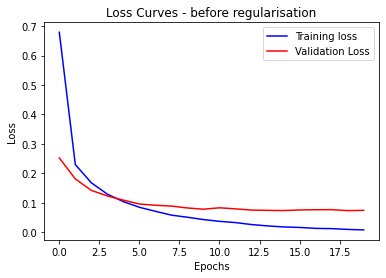

In [ ]:
#Check for Overfitting

plt.figure()
plt.plot(history.history['loss'], 'blue')
plt.plot(history.history['val_loss'], 'red')
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves - before regularisation')

In [ ]:
from tensorflow.keras.layers import Dropout
reg_model = Sequential()
reg_model.add(Dense(256, activation= 'relu', input_shape=(new_dimension,)))
reg_model.add(Dropout(0.4))
reg_model.add(Dense(128, activation= 'relu'))
reg_model.add(Dropout(0.4))
reg_model.add(Dense(no_labels, activation= 'softmax'))

reg_model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy,
                  metrics= ['accuracy'])
reg_history = reg_model.fit(x_train, y_train, validation_data=(x_val, y_val),
                            
                            epochs=20, batch_size=1000)
test_loss, test_accuracy = reg_model.evaluate(test_images, y_test)
print('Test loss: {}'.format(test_loss))
print('Test accuracy: {}'.format(test_accuracy))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 2s 34us/sample - loss: 0.9667 - acc: 0.6942 - val_loss: 0.2939 - val_acc: 0.9170
Epoch 2/20
50000/50000 [==============================] - 2s 33us/sample - loss: 0.3830 - acc: 0.8865 - val_loss: 0.2031 - val_acc: 0.9428
Epoch 3/20
50000/50000 [==============================] - 2s 33us/sample - loss: 0.2845 - acc: 0.9162 - val_loss: 0.1614 - val_acc: 0.9546
Epoch 4/20
50000/50000 [==============================] - 2s 33us/sample - loss: 0.2329 - acc: 0.9328 - val_loss: 0.1367 - val_acc: 0.9614
Epoch 5/20
50000/50000 [==============================] - 2s 34us/sample - loss: 0.2010 - acc: 0.9419 - val_loss: 0.1208 - val_acc: 0.9645
Epoch 6/20
50000/50000 [==============================] - 2s 34us/sample - loss: 0.1771 - acc: 0.9484 - val_loss: 0.1107 - val_acc: 0.9673
Epoch 7/20
50000/50000 [==============================] - 2s 34us/sample - loss: 0.1615 - acc: 0.9521 - val_loss: 0.

In [ ]:
test_loss, test_accuracy = reg_model.evaluate(test_images, y_test)
print('Test loss: {}'.format(test_loss))
print('Test accuracy: {}'.format(test_accuracy))

Test loss: 0.3347495187163353
Test accuracy: 0.9785000085830688


Text(0.5, 1.0, 'Loss Curve - after regularisation')

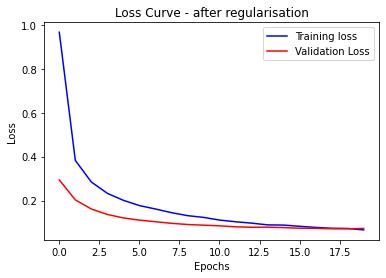

In [ ]:
plt.figure()
plt.plot(reg_history.history['loss'], 'blue')
plt.plot(reg_history.history['val_loss'], 'red')
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve - after regularisation')

In [ ]:
predictions = model.predict([test_images])
#make prediction
print(np.argmax(predictions[1000]))

9


<function matplotlib.pyplot.show>

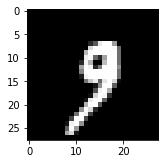

In [ ]:
#Let's se if the image would turn out to be 9
#Remember that the input data to the network were flattened for the purpose of learning to a vector with a length of 784. Before displaying it, we need to convert it back
#to the size of 28 x 28 pixels.
plt.figure(figsize=(8, 5))

plt.subplot(1,3,1)
plt.imshow(test_images[1000].reshape(28,28), cmap="gray")
#import the image
plt.show

In [ ]:
predictions = model.predict([test_images])
#make prediction
print(np.argmax(predictions[6700]))

4


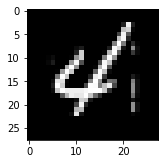

In [ ]:
plt.figure(figsize=(8,5))

plt.subplot(1,3,1)
plt.imshow(test_images[6700].reshape(28,28), cmap="gray")
plt.show()